### Lab 2 SparkRDD

In this lab we would be going through more in depth into RDD.

Some functions and things that would be introducted are:
1. map()
2. countby()
3. Key Value
4. ReduceByKey
5. Filtering in RDD
6. Flat Map vs Map Function

Test: This ipynb file has been hijacked to test git hub commits. Testing testing commits through different vscodes.

### Things needed to run Spark on Colab

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3-scala2.13.tgz
#If there is an error please check the spark version in the link above
!tar xf spark-3.4.4-bin-hadoop3-scala2.13.tgz
#Please change the version accoding to the downloaded version
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content//spark-3.4.4-bin-hadoop3-scala2.13"#Please change the version accoding to the downloaded version
import findspark
findspark.init()


**SparkSession**

In [3]:
from pyspark import SparkConf, SparkContext
import collections
#setting your context ('local') it means that it would be just run on our local system can change to clusters
conf = SparkConf().setMaster("local").setAppName("RatingsHistogram")
sc = SparkContext(conf = conf)

**Collections Module**

The collections module in Python provides specialized container datatypes that offer alternatives to the general-purpose built-in containers like dictionaries, lists, sets, and tuples. These specialized data structures are designed to address specific programming problems in a Pythonic and efficient way.

More information can be found here:
https://www.geeksforgeeks.org/python-collections-module/

**Reading of data and count the ratings**

The data can be found here:https://grouplens.org/datasets/movielens/


**u.data**

User ID,Movie ID,Rating, Timestamp

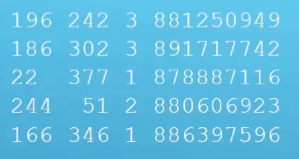



**Determine the count of Movie Ratings**


In [4]:
lines = sc.textFile("u.data")

# split where we just want the rating value. 3,3,1,2,1
# it would store this rating values in a variable called ratings rdd
ratings = lines.map(lambda x: x.split()[2])
print("initial partition count:"+str(ratings.getNumPartitions()))
# for element in ratings.collect():
#     print(element)

initial partition count:1


# .map() Function
map is a transformation operation that applies a function to each element of an RDD or DataFrame and returns a new RDD or DataFrame.

The function applied by map can transform each input element into a single output element.

*map maintains a one-to-one correspondence between input and output elements.*



```
input_rdd = sc.parallelize([1, 2, 3, 4, 5])
output_rdd = input_rdd.map(lambda x: x * 2)
```
In this case, each element in the input_rdd is doubled (example 1x2, 2X2) using the map transformation. The number of elements remanin the same from 5 to 5.

Another Example is this:


In [5]:
# Create an RDD from a list of numbers
numbers = sc.parallelize([1, 2, 3, 4, 5])

# Apply a map transformation to square each number
squared_numbers = numbers.map(lambda x: x ** 2)

# Collect and print the result
result = squared_numbers.collect()
print(result)


[1, 4, 9, 16, 25]


# Count By Function

It would count the reoccuring rating and add it into a sum caluclation.

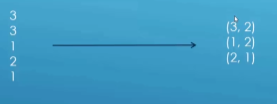

In [6]:
result = ratings.countByValue()

In [7]:
print(result)

defaultdict(<class 'int'>, {'3': 27145, '1': 6110, '2': 11370, '4': 34174, '5': 21201})


In [8]:
sortedResults = collections.OrderedDict(sorted(result.items()))
for key, value in sortedResults.items():
    print("%s %i" % (key, value))


1 6110
2 11370
3 27145
4 34174
5 21201


# Key Value RDD

Each element is a key-value pair. (Something like your Dictonary)

**Pair RDD Functions:**


*   aggregateByKey:Aggregates the values of each key in a dataset. It can return a different result type than the input RDD values.
*   combineByKey: Combines the elements for each key.
*   flatMapValues: Flattens the values of each key without changing the key values and preserves the original RDD partition.
*   reduceByKey: Merges the values of each key.
*   groupByKey: Returns a grouped RDD by grouping the values of each key.
*   mapValues: Applies a map function to each value in a pair RDD without changing the keys.
*   keys: Returns an RDD with just the keys.
*   values: Returns an RDD with just the values.

**Pair RDD Actions:**
collectAsMap: Returns the pair RDD as a Map to the Spark Master.

* countByKey: Returns the count of each key element (final result sent to the local Map on the driver).

* lookup: Returns a list of values from the RDD for a given input key.
And other actions for saving, joining, and processing key-value data 1.

In [9]:
conf = SparkConf().setMaster("local").setAppName("FriendsByAge")
sc = SparkContext.getOrCreate()



# ReduceByKey a Key Value RDD

Upload the fakefriends.csv dataset.

This dataset contations the following information:

id,Name,Age, Number of Friends

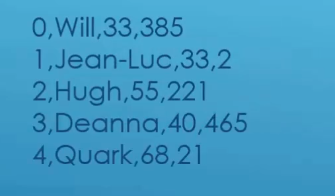

**Determine the total friends for each age**

In [10]:
def parseLine(line):
    fields = line.split(',')
    age = int(fields[2])
    numFriends = int(fields[3])
    return (age, numFriends)

lines = sc.textFile("fakefriends.csv")
rdd = lines.map(parseLine)



In [11]:
print("initial partition count:"+str(rdd.getNumPartitions()))

initial partition count:1


In [12]:
### to see the data
dataColl=rdd.collect()
for row in dataColl:
    print(row[1])#age is your key and value is your number of friends

385
2
221
465
21
318
220
307
380
181
191
372
253
444
49
49
323
13
455
246
220
268
72
271
1
445
100
363
476
364
175
161
281
197
249
305
81
21
65
192
413
167
75
345
244
77
96
49
1
254
283
212
269
31
5
278
194
294
158
284
100
442
9
54
15
169
477
135
74
204
393
184
179
384
208
459
201
407
337
348
445
440
465
308
311
383
257
481
188
492
471
88
7
63
133
173
233
361
178
491
460
123
18
2
142
417
499
419
274
417
137
46
13
244
275
397
75
487
304
344
264
355
400
439
429
284
84
284
221
252
350
309
462
265
340
427
335
32
384
193
234
424
335
124
93
470
174
373
248
340
313
441
235
342
389
126
360
319
340
438
112
207
14
204
172
282
10
57
112
92
490
126
204
129
87
459
474
316
381
426
108
404
145
488
84
287
109
225
369
23
294
349
497
125
2
376
173
76
381
180
472
174
469
125
164
236
491
206
271
174
245
73
284
312
182
6
116
260
350
345
394
150
346
406
277
106
207
198
293
150
397
42
481
70
22
8
442
469
305
345
154
332
101
68
471
174
260
338
138
41
342
57
174
116
79
324
412
161
217
11
96
172
334
33
228
471


Using reduceByKey to determine total number of people who are of that age

In [13]:
totalsByAge = rdd.mapValues(lambda x: (x, 1)).reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))


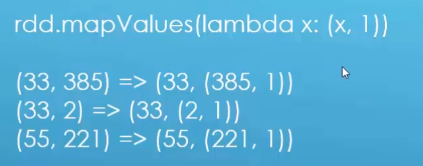

x is your key

(x,1) value
 where x is the number of friends and 1 represents the number of times that age occur, this would be used to do a sum later to get the number of times for example age 33 occurs

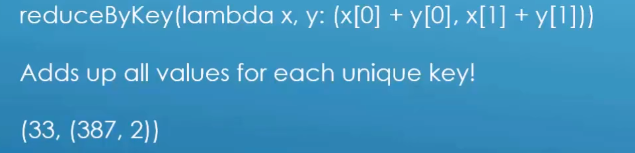

Where key is the individiaul age and the values linking it would be added to it such that you can get the total number of friends (387) and the number of times it occurs (2).

In [14]:
averagesByAge = totalsByAge.mapValues(lambda x: x[0] / x[1])
#x is your key (age)
#x[0] is the value for the sum of friends
# x[1]?


In [15]:
results = averagesByAge.collect()
for result in results:
    print(result)

(33, 325.3333333333333)
(26, 242.05882352941177)
(55, 295.53846153846155)
(40, 250.8235294117647)
(68, 269.6)
(59, 220.0)
(37, 249.33333333333334)
(54, 278.0769230769231)
(38, 193.53333333333333)
(27, 228.125)
(53, 222.85714285714286)
(57, 258.8333333333333)
(56, 306.6666666666667)
(43, 230.57142857142858)
(36, 246.6)
(22, 206.42857142857142)
(35, 211.625)
(45, 309.53846153846155)
(60, 202.71428571428572)
(67, 214.625)
(19, 213.27272727272728)
(30, 235.8181818181818)
(51, 302.14285714285717)
(25, 197.45454545454547)
(21, 350.875)
(42, 303.5)
(49, 184.66666666666666)
(48, 281.4)
(50, 254.6)
(39, 169.28571428571428)
(32, 207.9090909090909)
(58, 116.54545454545455)
(64, 281.3333333333333)
(31, 267.25)
(52, 340.6363636363636)
(24, 233.8)
(20, 165.0)
(62, 220.76923076923077)
(41, 268.55555555555554)
(44, 282.1666666666667)
(69, 235.2)
(65, 298.2)
(61, 256.22222222222223)
(28, 209.1)
(66, 276.44444444444446)
(46, 223.69230769230768)
(29, 215.91666666666666)
(18, 343.375)
(47, 233.22222222222

# Filtering in RDD

Remove unwanted information

In [16]:
conf = SparkConf().setMaster("local").setAppName("MinTemperatures")
sc = SparkContext.getOrCreate()

In [17]:
def parseLine(line):
    fields = line.split(',')
    stationID = fields[0]
    entryType = fields[2]
    temperature = float(fields[3])*0.1
    return (stationID, entryType, temperature)
lines = sc.textFile("1800.csv")
parsedLines = lines.map(parseLine)

**1800 Dataset**

Station ID

Date

entry Type (T Max= Temp Max, T Min= Temp Min)

Temperature in degree cel



In [18]:
 dataColl=parsedLines.collect()
 print(dataColl)


[('ITE00100554', 'TMAX', -7.5), ('ITE00100554', 'TMIN', -14.8), ('GM000010962', 'PRCP', 0.0), ('EZE00100082', 'TMAX', -8.6), ('EZE00100082', 'TMIN', -13.5), ('ITE00100554', 'TMAX', -6.0), ('ITE00100554', 'TMIN', -12.5), ('GM000010962', 'PRCP', 0.0), ('EZE00100082', 'TMAX', -4.4), ('EZE00100082', 'TMIN', -13.0), ('ITE00100554', 'TMAX', -2.3000000000000003), ('ITE00100554', 'TMIN', -4.6000000000000005), ('GM000010962', 'PRCP', 0.4), ('EZE00100082', 'TMAX', -1.0), ('EZE00100082', 'TMIN', -7.300000000000001), ('ITE00100554', 'TMAX', 0.0), ('ITE00100554', 'TMIN', -1.3), ('GM000010962', 'PRCP', 0.0), ('EZE00100082', 'TMAX', -5.5), ('EZE00100082', 'TMIN', -7.4), ('ITE00100554', 'TMAX', 1.0), ('ITE00100554', 'TMIN', -0.6000000000000001), ('GM000010962', 'PRCP', 0.0), ('EZE00100082', 'TMAX', -4.0), ('EZE00100082', 'TMIN', -5.800000000000001), ('ITE00100554', 'TMAX', 1.3), ('ITE00100554', 'TMIN', 1.3), ('GM000010962', 'PRCP', 0.0), ('EZE00100082', 'TMAX', -3.9000000000000004), ('EZE00100082', 'T

In [ ]:
minTemps = parsedLines.filter(lambda x: "TMIN" in x[1])
#get the values with only min temps and store into another RDD called minTemps. data format would still be the same.

stationTemps = minTemps.map(lambda x: (x[0], x[2]))
#save this into another rdd where you only have station id as key and the mini temp


In [ ]:
minTemps = stationTemps.reduceByKey(lambda x, y: min(x,y))
#take individual station id(key) and store the temp inside it. it would only update the lowest value inside the value due to the min

results = minTemps.collect();

In [ ]:
for result in results:
    print(result[0] + "\t{:.2f} Cel".format(result[1]))

ITE00100554	-14.80 Cel
EZE00100082	-13.50 Cel




```
# This is formatted as code
```

# Exercise 1
Using the 1800.csv Dataset

**How do we get the max Temp?**

ITE00100554	32.30Cel
EZE00100082	32.30Cel


**How to get the max Prcp for the dataset?**

GM000010962	30.50mm


# Flat Map vs map function

```
stationTemps = maxTemps.map(lambda x: (x[0], x[2]))
```
Change one RDD element to another new single RDD element using

```
.map()
```

flatMap, function to each element but can produce multiple output elements for each input element.

It is useful when operations that may require in different number of output elements. (i.e. from 1 to 10 elements)

It is used when dealing with text data, where you may want to split lines into words or perform more complex transformations.

Here's an example of flatMap in Spark, where we split lines of text into words:



```
 input_rdd = sc.parallelize(["Hello World", "Spark is awesome"])
output_rdd = input_rdd.flatMap(lambda line: line.split(" "))
```
It would split the indiviudal words into individual elements (i.e 1 vs 6 element)

**Choosing Between map and `flatMap:**

Choose map when your transformation logic is one-to-one, meaning each input element maps to exactly one output element.

Choose flatMap when your transformation may result in a different number of output elements compared to the input.



Counting words using flatMap

In [ ]:
conf = SparkConf().setMaster("local").setAppName("WordCount")
sc = SparkContext.getOrCreate()

In [ ]:
input = sc.textFile("Book.txt")
words = input.flatMap(lambda x: x.split())

word_counts=words.countByValue()


for word, count in word_counts.items():
    cleanWord = word.encode('ascii', 'ignore')
    if (cleanWord):
        print(cleanWord.decode() + " " + str(count))

Streaming output truncated to the last 5000 lines.
individual. 2
top-down 1
restrictions 2
make, 1
clients. 2
computer 6
programmer, 1
conform 1
style 4
guide 1
existing 17
architecture 1
artist, 1
show 16
Working 4
what's 6
important. 8
Did 2
dress 1
code 3
yourself? 1
meeting 2
clients, 2
want. 9
maintain 9
wardrobe. 1
Personally, 2
regardless; 1
helps 4
frame 1
mind. 5
IS 1
SELF-EMPLOYMENT 1
FOR 3
YOU? 1
Self-employment 4
forms 4
cannot 9
environment. 1
unbounded 1
rewards, 2
far, 5
serious. 1
Let's 8
you? 4
answer. 1
honestly 2
assess 1
diving 2
undertaking, 1
likelihood 2
success. 8
then, 1
guarantees 1
exercises 1
chapter 1
stand. 1
unimaginably 1
well, 11
badly. 1
We 6
favor 4
not, 13
conventional 2
workforce 1
savings 7
now. 6
FLOWCHART: 1
SHOULD 1
EVEN 1
CONSIDER 1
SELF-EMPLOYMENT? 1
Minimizing 1
ensuring 3
cushion 1
expenses. 6
truly 3
betting 1
farm 5
identify 8
store 1
changes. 2
flowchart 2
crazy 1
this. 2
reading 6
device 1
display 17
main 6
points: 1
HAVING 1
FINANCIAL 2

In [ ]:
for word, count in word_counts.items():
    cleanWord = word.encode('ascii', 'ignore')
    if (cleanWord):
        print(cleanWord.decode() + " " + str(count))

Streaming output truncated to the last 5000 lines.
individual. 2
top-down 1
restrictions 2
make, 1
clients. 2
computer 6
programmer, 1
conform 1
style 4
guide 1
existing 17
architecture 1
artist, 1
show 16
Working 4
what's 6
important. 8
Did 2
dress 1
code 3
yourself? 1
meeting 2
clients, 2
want. 9
maintain 9
wardrobe. 1
Personally, 2
regardless; 1
helps 4
frame 1
mind. 5
IS 1
SELF-EMPLOYMENT 1
FOR 3
YOU? 1
Self-employment 4
forms 4
cannot 9
environment. 1
unbounded 1
rewards, 2
far, 5
serious. 1
Let's 8
you? 4
answer. 1
honestly 2
assess 1
diving 2
undertaking, 1
likelihood 2
success. 8
then, 1
guarantees 1
exercises 1
chapter 1
stand. 1
unimaginably 1
well, 11
badly. 1
We 6
favor 4
not, 13
conventional 2
workforce 1
savings 7
now. 6
FLOWCHART: 1
SHOULD 1
EVEN 1
CONSIDER 1
SELF-EMPLOYMENT? 1
Minimizing 1
ensuring 3
cushion 1
expenses. 6
truly 3
betting 1
farm 5
identify 8
store 1
changes. 2
flowchart 2
crazy 1
this. 2
reading 6
device 1
display 17
main 6
points: 1
HAVING 1
FINANCIAL 2

# Exercise 2

Determine the total spend by a customer.
Given the dataset "customer-orders.csv"
Where it contains:

cusomter id, item id, amount spend on that item

Task:
To obtain the total spend by the cusomter. Example customer id 24 spends on item id 3 and 69. I would like to know the total spend for both.

Customer ID 44: Total amount spent $4756.89
Customer ID 35: Total amount spent $5155.42
Customer ID 2: Total amount spent $5994.59
Customer ID 47: Total amount spent $4316.30
Customer ID 29: Total amount spent $5032.53
Customer ID 91: Total amount spent $4642.26
Customer ID 70: Total amount spent $5368.25
Customer ID 85: Total amount spent $5503.43
Customer ID 53: Total amount spent $4945.30
Customer ID 14: Total amount spent $4735.03
Customer ID 51: Total amount spent $4975.22
Customer ID 42: Total amount spent $5696.84
Customer ID 79: Total amount spent $3790.57
Customer ID 50: Total amount spent $4517.27
Customer ID 20: Total amount spent $4836.86
Customer ID 15: Total amount spent $5413.51
Customer ID 5: Total amount spent $4561.07
Customer ID 48: Total amount spent $4384.33
Customer ID 31: Total amount spent $4765.05
Customer ID 4: Total amount spent $4815.05
Customer ID 36: Total amount spent $4278.05
Customer ID 57: Total amount spent $4628.40
Customer ID 12: Total amount spent 

CheatSheet on Spark RDD [Link](https://storage.googleapis.com/kaggle-forum-message-attachments/713467/14747/PySpark%20RDD%20CheatSheet.pdf)